In [1]:
import sys
sys.path.append('../src')

import numpy as np
import random
import tensorflow as tf

from data_loading import BavarianBuildingDataset, generator
from visualize import Visualizer

from backbone import Backbone
from rpn import RPN
from roi_align import ROIAlignLayer
from classifier import Classifier
from mask_head import MaskHead
from utils import Config

In [2]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [3]:
config = Config()
config.info()

image_dir: ../data/bbd250-image/
mask_dir: ../data/bbd250-umring/
image_shape: (250, 250, 3)
num_classes: 2
batch_size: 16
model_dir: ../model/
backbone_weights: imagenet
backbone_trainable_layers: 3
rpn_conv_filters: 512
rpn_clip_offset: 1e-06
rpn_max_proposals: 100
rpn_iou_threshold: 0.7
rpn_score_threshold: 0.5
rpn_optimizer: adam
roi_align_sample_grid: (14, 14)
roi_align_sample_offset: 1e-07
roi_align_pool_size: (2, 2)
classifier_dense_units: 1024
classifier_optimizer: adam
mask_head_conv_filters: 256
mask_head_upsample_filters: 256
mask_head_optimizer: adam
anchor_scales: [0.5, 1, 1.5, 2]
anchor_ratios: [1, 1.5, 2]


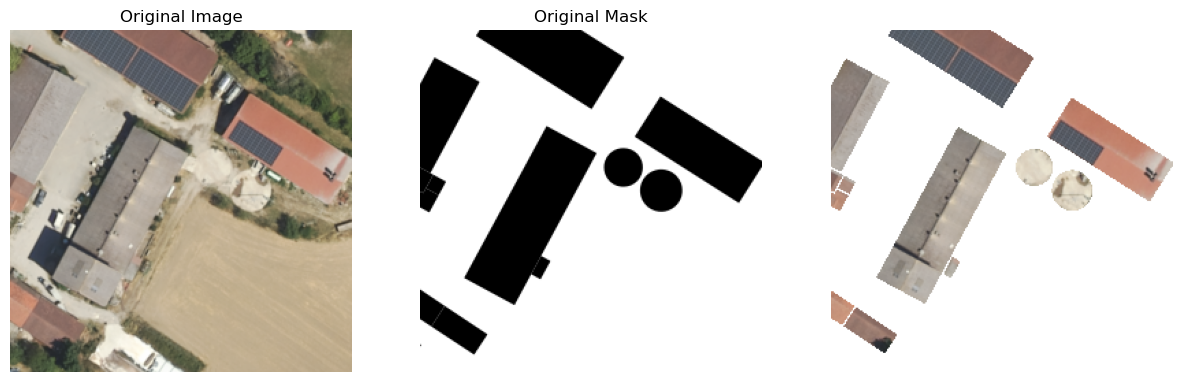

In [4]:
dataset = BavarianBuildingDataset(image_dir=config.image_dir, mask_dir=config.mask_dir)
gen = generator(dataset, dataset.train_test_val_split()[1], batch_size=config.batch_size)

images, masks = next(gen)
test_idx = 0

Visualizer.display_sample(images[test_idx], masks[test_idx])

1/1 [==============================] - 2s 2s/step


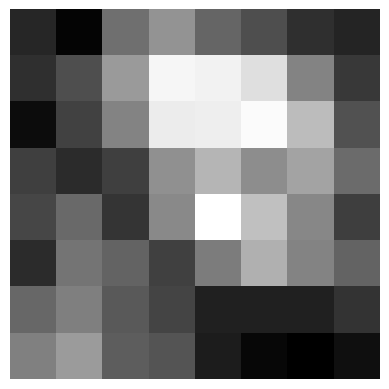

In [5]:
backbone = Backbone(config)
feature_maps = backbone.model.predict(images)

Visualizer.display_avg_feature_map(feature_maps[test_idx])

1/1 [==============================] - 4s 4s/step


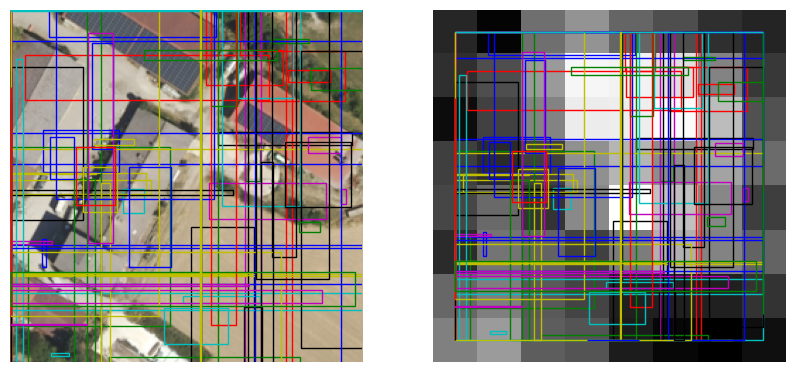

In [6]:
rpn = RPN(config, backbone)
roi_boxes = rpn.model.predict(feature_maps)

Visualizer.display_rois(images[test_idx], feature_maps[test_idx], roi_boxes[test_idx])

1/1 [==============================] - 39s 39s/step


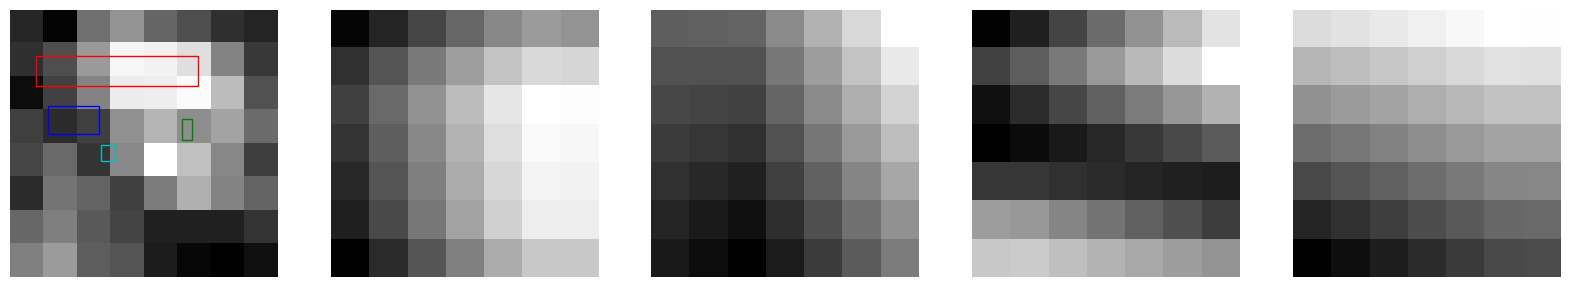

In [7]:
roi_align = ROIAlignLayer(config, backbone, rpn)
aligned_rois = roi_align.model.predict([feature_maps, roi_boxes]) # TODO: Extreme memory usage when predicting

Visualizer.display_aligned_rois(feature_maps[test_idx], roi_boxes[test_idx], aligned_rois[test_idx])